# Visualizing the mouse behavior

In [1]:
import sys
sys.path.append('/Users/shayneufeld/GitHub/mouse_bandit/data_preprocessing_code')
sys.path.append('/Users/shayneufeld/GitHub/mouse_bandit')
import support_functions as sf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy as sp
import bandit_preprocessing as bp
import sys
import os
%matplotlib inline 

## load in csv files (from running exportTrials.m)

### Mouse data

In [2]:
data90 = pd.read_csv('/Users/shayneufeld/GitHub/mouse_bandit/data/processed_data/full_9010_02192017.csv',index_col=0)
data80 = pd.read_csv('/Users/shayneufeld/GitHub/mouse_bandit/data/processed_data/full_8020_02192017.csv',index_col=0)
data70 = pd.read_csv('/Users/shayneufeld/GitHub/mouse_bandit/data/processed_data/full_7030_02192017.csv',index_col=0)

### HMM data

In [3]:
'''
data90 = pd.read_csv('/Users/shayneufeld/GitHub/mouse_bandit/data/processed_data/hmm_matrix_full_9010.csv',index_col=0)
data80 = pd.read_csv('/Users/shayneufeld/GitHub/mouse_bandit/data/processed_data/hmm_matrix_full_8020.csv',index_col=0)
data70 = pd.read_csv('/Users/shayneufeld/GitHub/mouse_bandit/data/processed_data/hmm_matrix_full_7030.csv',index_col=0)
'''

"\ndata90 = pd.read_csv('/Users/shayneufeld/GitHub/mouse_bandit/data/processed_data/hmm_matrix_full_9010.csv',index_col=0)\ndata80 = pd.read_csv('/Users/shayneufeld/GitHub/mouse_bandit/data/processed_data/hmm_matrix_full_8020.csv',index_col=0)\ndata70 = pd.read_csv('/Users/shayneufeld/GitHub/mouse_bandit/data/processed_data/hmm_matrix_full_7030.csv',index_col=0)\n"

## Collapse into single df

In [4]:
data90['Condition'] = '90-10'
data80['Condition'] = '80-20'
data70['Condition'] = '70-30'

datas = data90.append(data80)
datas = datas.append(data70)

In [5]:
datas.shape

(77487, 51)

# Compare prevalance of switches following reward

In [6]:
fontsize=20

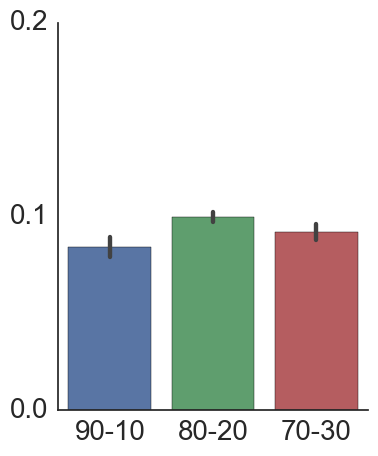

In [7]:
sns.set_style('white')
plt.figure(figsize=(4,5))
sns.barplot(x='Condition',y='Switch',data=datas,n_boot = 1000,ci=95)
plt.ylim(0,0.2)
#plt.title('p(switch) after rewarded trial',fontsize=20)
plt.xticks(fontsize=fontsize)
plt.yticks([0,0.1,0.2],fontsize=fontsize)
#plt.ylabel('fraction switch trials',fontsize=fontsize)
#plt.xlabel('Condition',fontsize=15)
plt.ylabel('')
plt.xlabel('')
sns.despine()

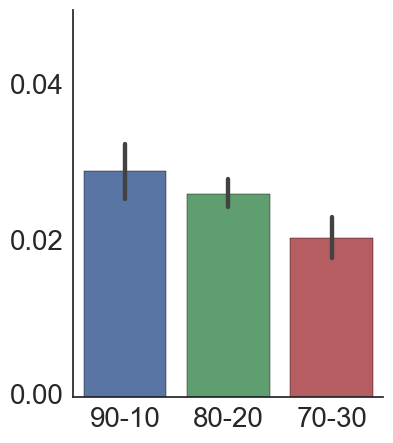

In [8]:
sns.set_style('white')
plt.figure(figsize=(4,5))
sns.barplot(x='Condition',y='Switch',data=datas[datas['1_Reward']==1],n_boot = 1000,ci=95)
plt.ylim(0,0.05)
#plt.title('p(switch) after rewarded trial',fontsize=20)
plt.xticks(fontsize=fontsize)
plt.yticks([0,0.02,0.04],fontsize=fontsize)
#plt.ylabel('fraction switch trials',fontsize=fontsize)
#plt.xlabel('Condition',fontsize=15)
plt.ylabel('')
plt.xlabel('')
sns.despine()

## Stats for p(switch) after unrewarded trial

In [22]:
d = datas[((datas['Condition']=='90-10') & (datas['1_Reward']==0))]
u9 = d['Switch'].mean()
s9 = d['Switch'].std() / np.sqrt(d.shape[0])

d = datas[((datas['Condition']=='80-20') & (datas['1_Reward']==0))]
u8 = d['Switch'].mean()
s8 = d['Switch'].std() / np.sqrt(d.shape[0])

d = datas[((datas['Condition']=='70-30') & (datas['1_Reward']==0))]
u7 = d['Switch'].mean()
s7 = d['Switch'].std() / np.sqrt(d.shape[0]) 

print('90-10: %.03f pm %.03f' % (u9,s9))
print('80-20: %.03f pm %.03f' % (u8,s8))
print('70-30: %.03f pm %.03f' % (u7,s7))

90-10: 0.285 pm 0.009
80-20: 0.259 pm 0.004
70-30: 0.200 pm 0.005


## Stats for p(switch) after rewarded trial

In [23]:
d = datas[((datas['Condition']=='90-10') & (datas['1_Reward']==1))]
u9 = d['Switch'].mean()
s9 = d['Switch'].std() / np.sqrt(d.shape[0])

d = datas[((datas['Condition']=='80-20') & (datas['1_Reward']==1))]
u8 = d['Switch'].mean()
s8 = d['Switch'].std() / np.sqrt(d.shape[0])

d = datas[((datas['Condition']=='70-30') & (datas['1_Reward']==1))]
u7 = d['Switch'].mean()
s7 = d['Switch'].std() / np.sqrt(d.shape[0]) 

print('90-10: %.03f pm %.03f' % (u9,s9))
print('80-20: %.03f pm %.03f' % (u8,s8))
print('70-30: %.03f pm %.03f' % (u7,s7))

90-10: 0.029 pm 0.002
80-20: 0.026 pm 0.001
70-30: 0.021 pm 0.001


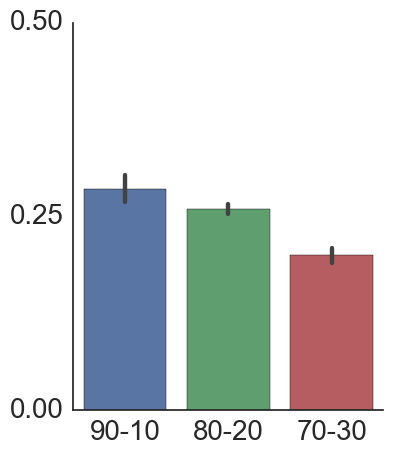

In [24]:
plt.figure(figsize=(4,5))
sns.barplot(x='Condition',y='Switch',data=datas[datas['1_Reward']==0],n_boot = 1000,ci=95)
plt.ylim(0,0.5)
#plt.title('p(switch) after unrewarded trial',fontsize=20)
plt.xticks(fontsize=fontsize)
plt.yticks([0,0.25,0.5],fontsize=fontsize)
plt.ylabel('fraction switch trials',fontsize=fontsize)
plt.xlabel('Condition',fontsize=15)
plt.ylabel('')
plt.xlabel('')
sns.despine()

['70-30' '80-20' '90-10']


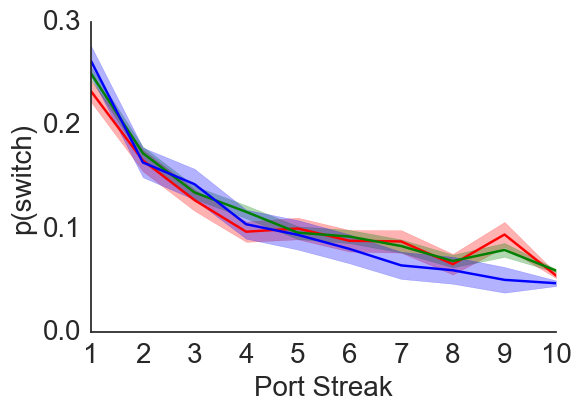

In [25]:
conditions = np.unique(datas['Condition'].values)
print(conditions)
colors = ['red','green','blue']

for j,condition in enumerate(conditions):
    data = datas[datas['Condition'] == condition].copy()
    port_streaks = np.unique(data['Port Streak'].values)
    p_switch = np.zeros((port_streaks.shape[0],2))

    for i,streak in enumerate(port_streaks):
            switches = data[data['Port Streak'] == streak]['Switch']
            p_switch[i,0] = switches.mean()
            p_switch[i,1] = switches.std() / np.sqrt(switches.shape[0])

    plt.plot(port_streaks,p_switch[:,0],color=colors[j])
    plt.fill_between(x=port_streaks,y1=p_switch[:,0]+p_switch[:,1],y2=p_switch[:,0]-p_switch[:,1],color=colors[j],alpha=0.3)
    plt.xlabel('Port Streak',fontsize=fontsize)
    plt.ylabel('p(switch)',fontsize=fontsize)
    plt.xticks(fontsize=20)
    plt.yticks([0,0.1,0.2,0.3],fontsize=fontsize)


sns.despine()

['70-30' '80-20' '90-10']


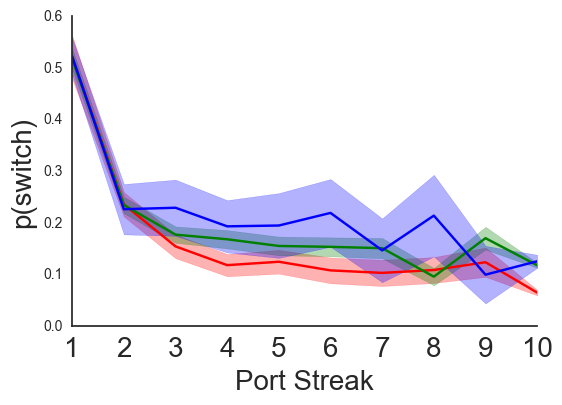

In [47]:
conditions = np.unique(datas['Condition'].values)
print(conditions)
colors = ['red','green','blue']

for j,condition in enumerate(conditions):
    data = datas[((datas['Condition'] == condition) & (datas['Reward Streak'] == -1))].copy()
    port_streaks = np.unique(data['Port Streak'].values)
    p_switch = np.zeros((port_streaks.shape[0],2))

    for i,streak in enumerate(port_streaks):
            switches = data[data['Port Streak'] == streak]['Switch']
            p_switch[i,0] = switches.mean()
            p_switch[i,1] = switches.std() / np.sqrt(switches.shape[0])

    plt.plot(port_streaks,p_switch[:,0],color=colors[j])
    plt.fill_between(x=port_streaks,y1=p_switch[:,0]+p_switch[:,1],y2=p_switch[:,0]-p_switch[:,1],color=colors[j],alpha=0.3)
    plt.xlabel('Port Streak',fontsize=fontsize)
    plt.ylabel('p(switch)',fontsize=fontsize)
    plt.xticks(fontsize=20)
    #plt.yticks([0,0.1,0.2,0.3],fontsize=fontsize)


sns.despine()

# Compare to win-stay lose-switch

['70-30' '80-20' '90-10']


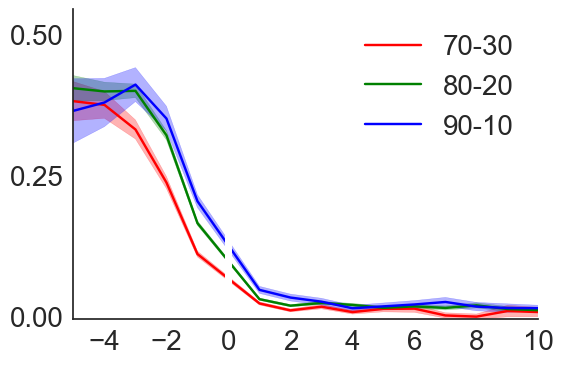

In [51]:
conditions = np.unique(datas['Condition'].values)
print(conditions)
colors = ['red','green','blue']

for j,condition in enumerate(conditions):
    data = datas[datas['Condition'] == condition].copy()
    reward_streaks = np.unique(data['Reward Streak'].values)
    p_switch = np.zeros((reward_streaks.shape[0],2))

    for i,streak in enumerate(reward_streaks):
            switches = data[data['Reward Streak'] == streak]['Switch']
            p_switch[i,0] = switches.mean()
            p_switch[i,1] = switches.std() / np.sqrt(switches.shape[0])

    plt.plot(reward_streaks,p_switch[:,0],color=colors[j],label=condition)
    plt.fill_between(x=reward_streaks,y1=p_switch[:,0]+p_switch[:,1],y2=p_switch[:,0]-p_switch[:,1],color=colors[j],alpha=0.3)
    #plt.xlabel('Reward Streak',fontsize=fontsize)
    #plt.ylabel('p(switch)',fontsize=fontsize)
    plt.yticks([0,0.25,0.5,0.75],fontsize=fontsize)
    plt.ylim(0,0.55)
    plt.xticks(fontsize=20)
    plt.xlim(-5,10)
    plt.legend(loc='best',fontsize=fontsize)
    #plt.yticks([0,0.1,0.2,0.3],fontsize=20)
    plt.vlines(x=0,ymin=0.01,ymax=0.5,color='white',linewidth=5,zorder=10)

    sns.despine()

In [ ]:
boolean_2R = ((datas['1_Port']==1) & (datas['2_Port'] == 1) & (datas['1_Reward']==1) & (datas['2_Reward']==1))
boolean_2NR = ((datas['1_Port']==1) & (datas['2_Port'] == 1) & (datas['1_Reward']==0) & (datas['2_Reward']==0))

In [ ]:
sns.barplot(x='Condition',y='Decision',data = datas[boolean_2R] )

In [ ]:
sns.barplot(x='Condition',y='Decision',data = datas[boolean_2NR] )
plt.ylim(0,1)

In [ ]:
boolean_2NR_R = ((datas['1_Port']==0) & (datas['2_Port'] == 0) & (datas['1_Reward']==0) & (datas['2_Reward']==0))
sns.barplot(x='Condition',y='Decision',data = datas[boolean_2NR_R] )
plt.ylim(0,1)

In [ ]:
boolean_2NR_R = ((datas['1_Reward']==0) & (datas['2_Reward']==0))
sns.barplot(x='Condition',y='Switch',data = datas[boolean_2NR_R] )